In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data = pd.read_excel('24MAG_HW_1_v4.xls') #  index_col = ['Ages', 'Count_dependent', 'Income', 'Time_period_reg', 'Estimation', 'Credit_size'])

In [3]:
data.head()

,Ages,Count_dependent,Income,Time_period_reg,Estimation,Credit_size
0,41.0,2.0,11900.0,11.0,12000.0,119000.0
1,31.0,1.0,NaN,4.0,22000.0,221000.0
2,28.0,1.0,30700.0,2.0,30000.0,300000.0
3,NaN,2.0,12600.0,13.0,13000.0,128000.0
4,25.0,1.0,31900.0,0.0,30000.0,309000.0


In [4]:
print("Количество клиентов:", data.shape[0])

Количество клиентов: 52


# Данные. Выполнить первичную обработку данных. Сделать первые выводы

### 1. Рассмотрите данные и вычислите основные характеристики признаков: среднее, стандартное отклонение, медиана, квартили.  Постройте гистограммы признаков и блок диаграммы  признаков. Сделайте первые выводы о возможном распределении признаков

In [5]:
def describe_info_data(dataset):
    summary = dataset.describe().transpose()
    summary['median'] = data.median()

    summary = summary.rename(columns={
        'mean': 'Среднее',
        'std': 'Стандартное отклонение',
        '50%': 'Медиана',
        '25%': '1-й квартиль',
        '75%': '3-й квартиль'
    })

    return summary[['Среднее', 'Стандартное отклонение', 'Медиана', '1-й квартиль', '3-й квартиль']]

In [6]:
pd.DataFrame(describe_info_data(dataset=data))

,Среднее,Стандартное отклонение,Медиана,1-й квартиль,3-й квартиль
Ages,39.020408,8.842346,39.0,34.0,46.0
Count_dependent,1.979592,0.989314,2.0,1.0,3.0
Income,19167.346939,10169.590859,16700.0,11900.0,28700.0
Time_period_reg,10.140000,5.018374,11.0,6.0,14.0
Estimation,20959.183673,10816.575212,19000.0,13000.0,30000.0
Credit_size,202980.000000,99702.105273,201000.0,126500.0,293000.0


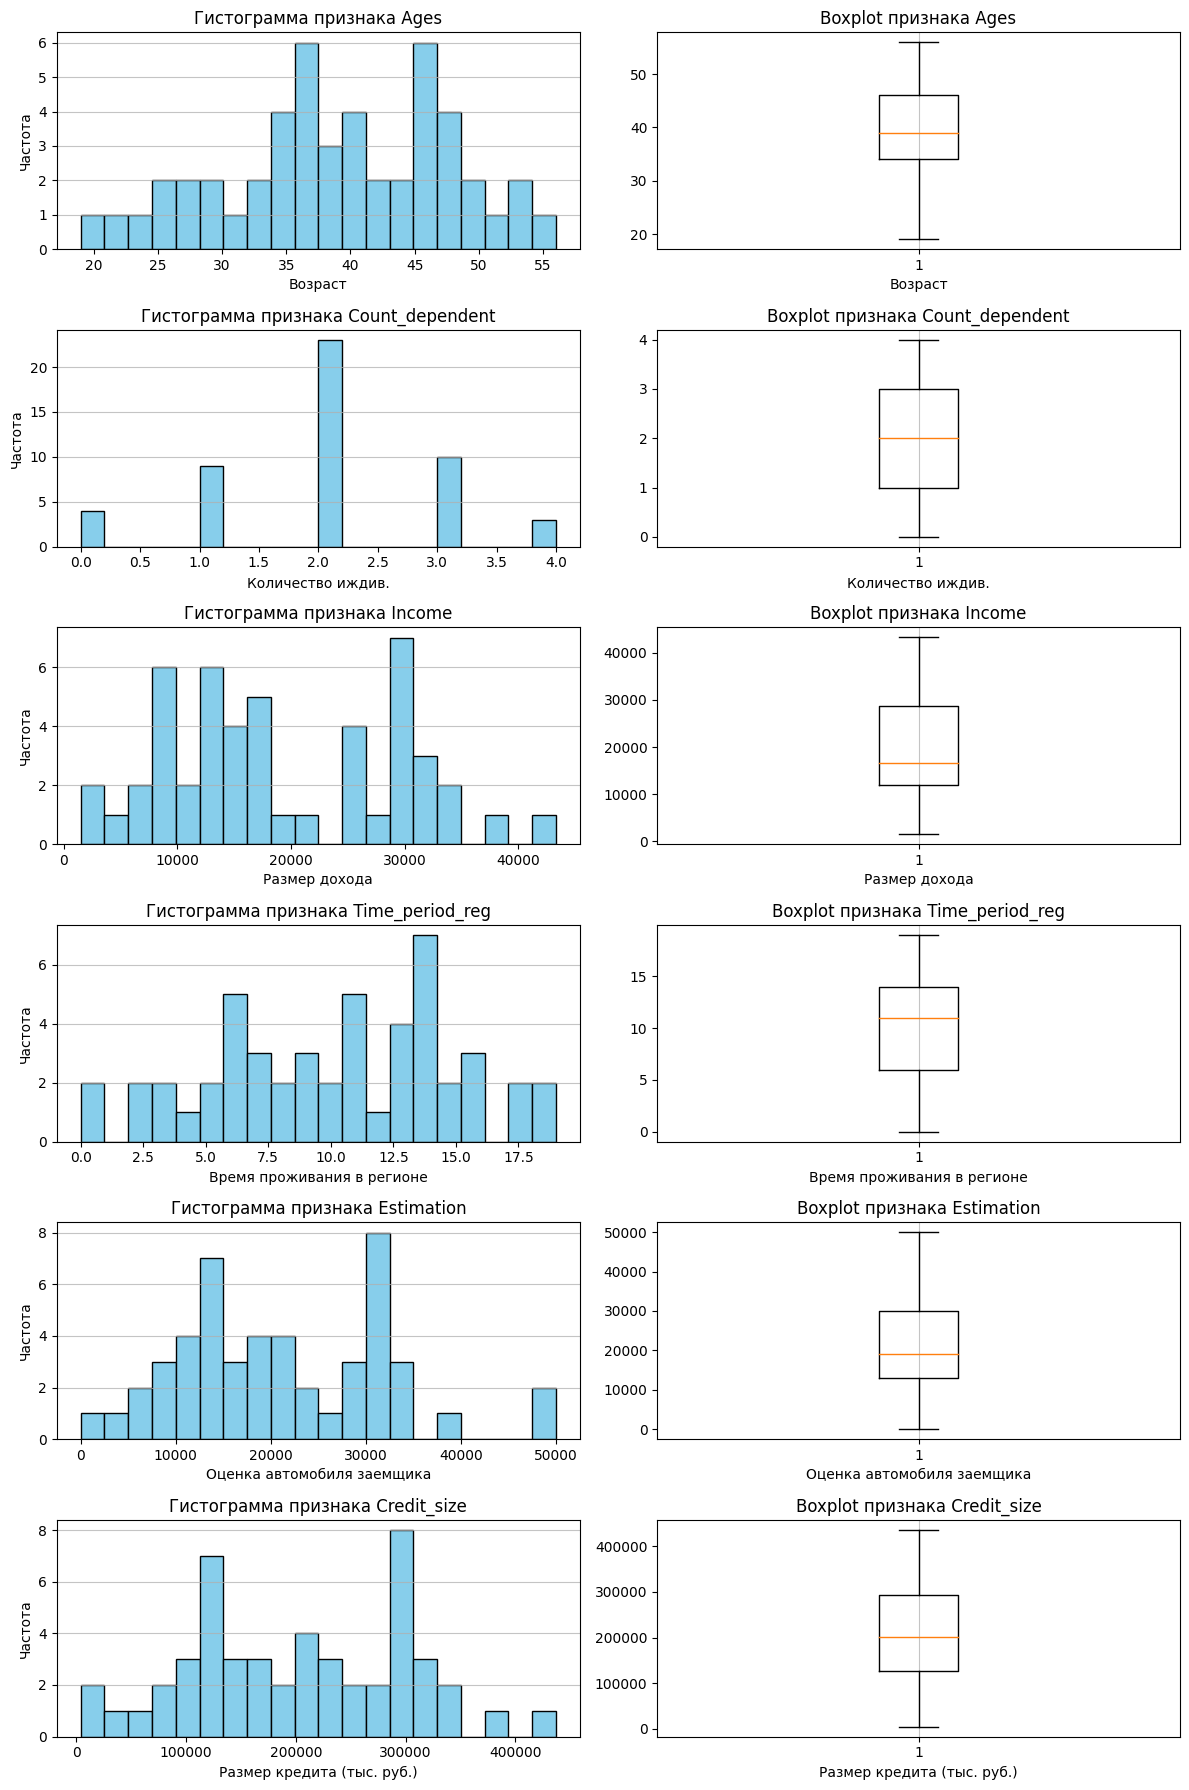

In [7]:
fig, axs = plt.subplots(6, 2, figsize=(12, 18))

# -------------------------------------------- Ages ---------------------------------------------#
axs[0, 0].hist(data['Ages'], bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Гистограмма признака Ages')
axs[0, 0].set_xlabel('Возраст')
axs[0, 0].set_ylabel('Частота')
axs[0, 0].grid(axis='y', alpha=0.75)

df = data.dropna(subset=['Ages'])
axs[0, 1].boxplot(x = df['Ages'])
axs[0, 1].set_title('Boxplot признака Ages')
axs[0, 1].set_xlabel('Возраст')
axs[0, 1].grid(axis='x', alpha=0.75)

# -------------------------------------------- Count ---------------------------------------------#
axs[1, 0].hist(data['Count_dependent'], bins=20, color='skyblue', edgecolor='black')
axs[1, 0].set_title('Гистограмма признака Count_dependent')
axs[1, 0].set_xlabel('Количество иждив.')
axs[1, 0].set_ylabel('Частота')
axs[1, 0].grid(axis='y', alpha=0.75)

df = data.dropna(subset=['Count_dependent'])
axs[1, 1].boxplot(df['Count_dependent'])
axs[1, 1].set_title('Boxplot признака Count_dependent')
axs[1, 1].set_xlabel('Количество иждив.')
axs[1, 1].grid(axis='x', alpha=0.75)

# -------------------------------------------- Income ---------------------------------------------#
axs[2, 0].hist(data['Income'], bins=20, color='skyblue', edgecolor='black')
axs[2, 0].set_title('Гистограмма признака Income')
axs[2, 0].set_xlabel('Размер дохода')
axs[2, 0].set_ylabel('Частота')
axs[2, 0].grid(axis='y', alpha=0.75)

df = data.dropna(subset=['Income'])
axs[2, 1].boxplot(df['Income'])
axs[2, 1].set_title('Boxplot признака Income')
axs[2, 1].set_xlabel('Размер дохода')
axs[2, 1].grid(axis='x', alpha=0.75)

# -------------------------------------------- Time_period_reg ---------------------------------------------#
axs[3, 0].hist(data['Time_period_reg'], bins=20, color='skyblue', edgecolor='black')
axs[3, 0].set_title('Гистограмма признака Time_period_reg')
axs[3, 0].set_xlabel('Время проживания в регионе')
axs[3, 0].set_ylabel('Частота')
axs[3, 0].grid(axis='y', alpha=0.75)

df = data.dropna(subset=['Time_period_reg'])
axs[3, 1].boxplot(df['Time_period_reg'])
axs[3, 1].set_title('Boxplot признака Time_period_reg')
axs[3, 1].set_xlabel('Время проживания в регионе')
axs[3, 1].grid(axis='x', alpha=0.75)

# -------------------------------------------- Estimation ---------------------------------------------#
axs[4, 0].hist(data['Estimation'], bins=20, color='skyblue', edgecolor='black')
axs[4, 0].set_title('Гистограмма признака Estimation')
axs[4, 0].set_xlabel('Оценка автомобиля заемщика')
axs[4, 0].set_ylabel('Частота')
axs[4, 0].grid(axis='y', alpha=0.75)

df = data.dropna(subset=['Estimation'])
axs[4, 1].boxplot(df['Estimation'])
axs[4, 1].set_title('Boxplot признака Estimation')
axs[4, 1].set_xlabel('Оценка автомобиля заемщика')
axs[4, 1].grid(axis='x', alpha=0.75)

# -------------------------------------------- Credit_size ---------------------------------------------#
axs[5, 0].hist(data['Credit_size'], bins=20, color='skyblue', edgecolor='black')
axs[5, 0].set_title('Гистограмма признака Credit_size')
axs[5, 0].set_xlabel('Размер кредита (тыс. руб.)')
axs[5, 0].set_ylabel('Частота')
axs[5, 0].grid(axis='y', alpha=0.75)

df = data.dropna(subset=['Credit_size'])
axs[5, 1].boxplot(df['Credit_size'])
axs[5, 1].set_title('Boxplot признака Credit_size')
axs[5, 1].set_xlabel('Размер кредита (тыс. руб.)')
axs[5, 1].grid(axis='x', alpha=0.75)

plt.tight_layout()
plt.show()

**Возраст.** Средний и медианный возраст (39.0) близки друг к другу, что указывает на отсутствие сильных выбросов в данных о возрасте. Стандартное отклонение (8.84) говорит о том, что разброс возрастов в выборке имеет среднюю величину.

**Количество иждивенцев.** В среднем, участники имеют чуть меньше 2 иждивенцев, с разбросом от 1 до 3 иждивенцев у 50% выборки. По гистограмме можно предположить, что данные имеют нормальное распределение.

**Доход.** Средний доход выше медианы, что может указывать на наличие нескольких высоких доходов, влияющих на среднее. Также высокое стандартное отклонение (10169.59) показывает значительный разброс доходов.

**Срок проживания в регионе.** Средний период проживания в регоине также близок к медиане, что указывает на некоторую симметрию распределения. Разброс средний (стандартное отклонение 5.02).

**Оценка автомобиля заемщика.** Среднее оценки автомобиля превышает медиану, что может указывать на некоторое количество высоких значений.Также мощный разброс в оценках (стандартное отклонение 10816.58).

**Размер кредита.** Существует широкий диапазон размеров кредитов с некоторым количеством крупных кредитов, что приводит к высокому стандартному отклонению (99702.1).



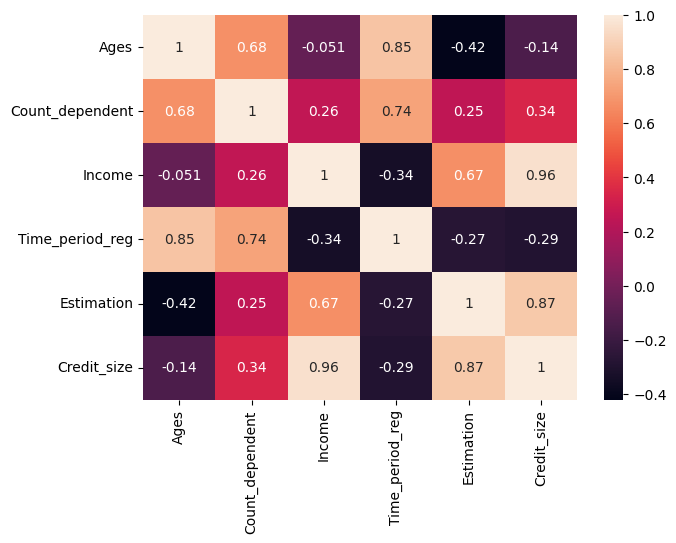

In [8]:
corr = data.corr(method='pearson')
plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True);

**Комментарий:** Как видно из матрицы корреляции, материальные признаки имеют большую корреляцию между собой. В частности признак `Credit_size` (размер кредита) имеет корреляцию по Пирсону с `income` (размер дохода) и `Estimation` (оценка автомобиля) 0.96 и 0.87 соответственно.

Также нематериальные признаки тоже имеют большую корреляцию между собой: признак `Ages` (возраст) сильно зависит от `Count_dependent` (количество иждивенцев) и `Time_period_reg` (время проживания в регионе) - 0.68 и 0.85 соответственно.

В целом эти наблюдения вполне логичны со смысловой точки зрения.

### 2. В данных есть пропуски. Подберите из литературы метод восстановления пропущенных данных и заполните пропуски по этому методу.

In [9]:
print('Количестов пропусков по признакам:')
pd.DataFrame(data.isna().sum())

Количестов пропусков по признакам:


,0
Ages,3
Count_dependent,3
Income,3
Time_period_reg,2
Estimation,3
Credit_size,2


#### 1. Заполнение средними.

In [10]:
df = data.copy()

columns = df.columns
for col in columns:
    df.fillna({col : df[col].mean()}, inplace=True)

pd.DataFrame(describe_info_data(dataset = df))

,Среднее,Стандартное отклонение,Медиана,1-й квартиль,3-й квартиль
Ages,39.020408,8.578335,39.020408,34.750000,46.00
Count_dependent,1.979592,0.959775,2.000000,1.734694,2.25
Income,19167.346939,9865.952301,17250.000000,12050.000000,28700.00
Time_period_reg,10.140000,4.918991,10.570000,6.000000,14.00
Estimation,20959.183673,10493.619319,20479.591837,13000.000000,30000.00
Credit_size,202980.000000,97727.610645,202490.000000,127500.000000,293000.00


#### 2. Заполнение медианой.

In [11]:
df = data.copy()

columns = df.columns
for col in columns:
    df.fillna({col : df[col].median()}, inplace=True)

pd.DataFrame(describe_info_data(dataset = df))

,Среднее,Стандартное отклонение,Медиана,1-й квартиль,3-й квартиль
Ages,39.019231,8.578337,39.0,34.75,46.00
Count_dependent,1.980769,0.959787,2.0,1.75,2.25
Income,19025.000000,9883.039046,16700.0,12050.00,28700.00
Time_period_reg,10.173077,4.921825,11.0,6.00,14.00
Estimation,20846.153846,10503.752113,19000.0,13000.00,30000.00
Credit_size,202903.846154,97728.366969,201000.0,127500.00,293000.00


#### 3. Заполнение KNNImputer

In [12]:
from sklearn.impute import KNNImputer

df = data.copy()
imputer = KNNImputer(n_neighbors=2)

df_imputed = imputer.fit_transform(df)

df_filled = pd.DataFrame(df_imputed, columns=df.columns)

pd.DataFrame(describe_info_data(dataset = df_filled))

,Среднее,Стандартное отклонение,Медиана,1-й квартиль,3-й квартиль
Ages,38.971154,8.830880,39.5,33.75,46.0
Count_dependent,2.000000,0.970143,2.0,1.75,3.0
Income,19337.500000,10082.541089,16750.0,12050.00,28825.0
Time_period_reg,10.067308,5.021550,11.0,6.00,14.0
Estimation,20903.846154,10635.234845,18500.0,13000.00,30000.0
Credit_size,200971.153846,98269.557923,193000.0,127500.00,293000.0


**Комментарий:** Так как KNNImputer в процессе заполнения пропусков использует информацию о других колонках, а в нашем случае данных очень мало, то мы выберем именно этот метод в пользу метода заполнения mean и median.

In [13]:
df_filled = df_filled.copy()

### 3. В данных возможны выбросы. Подберите из литературы метод определения выбросов и удалите объекты, идентифицированные как выбросы по этому методу.

В качестве проверки данных на выбросы мы выбрали 2 способа - с помщью iqr-перцентиля или с помощью Z-оценки.

1. Проверим с помощью iqr-перцентиля.

In [14]:
def clean_by_iqr(dataset):
    for column in dataset.columns:
        Q1 = dataset[column].quantile(0.25)
        Q3 = dataset[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        dataset = dataset[(dataset[column] >= lower_bound) & (dataset[column] <= upper_bound)]
    return dataset

In [15]:
data = clean_by_iqr(df_filled)

if df_filled.shape[0] != data.shape[0]:
    print("Исходные данные:")
    print(df_filled)
    print("\n Данные без выбросов (метод iqr):")
    print(data)
else:
    print('B данных нет выбросов!')

B данных нет выбросов!


2. Теперь проверим с помощью Z-оценки.

In [16]:
def clean_by_zscore(df):
    df_filtered = df.copy()
    for column in df_filtered.select_dtypes(include=['float64', 'int64']):
        mean = df_filtered[column].mean()
        std = df_filtered[column].std()
        z_scores = (df_filtered[column] - mean) / std

        df_filtered = df_filtered[abs(z_scores) < 3]
    return df_filtered

In [17]:
data = clean_by_zscore(df_filled)

if df_filled.shape[0] != data.shape[0]:
    print("Исходные данные:")
    print(df_filled)
    print("\n Данные без выбросов (метод Z-оценки):")
    print(data)
else:
    print('B данных нет выбросов!')

B данных нет выбросов!


**Вывод:** При использовании обоих методов было установлено, что в данных не было выбросов. (В качетсве теста, мы искусственно добавили выбросы и заметили, что медоты их находят, так что делаем вывод, что метод работает корректно, и данные у нас не содержат выбросов.)

# Снижение размерности. Метод PCA (Principal Component Analysis=метод главных компонент).

### 4. Выполнить центрирование данных и такую нормировку, что евклидова норма каждого признака равна 1 (полученная матрица обозначается через Z).

In [18]:
n = data.shape[0]
m = data.shape[1]
p = min(n, m)

print(f"n = {n}")
print(f"m = {m}")
print(f"p = min(n, m) = {min(n, m)}")

n = 52
m = 6
p = min(n, m) = 6


Для начала выполним центрирование данных и вычислим норму по каждому признаку, а также получим нумерованные данные.

In [19]:
Y_data_centr = data.copy()
for column in Y_data_centr.columns:
    data_center_mean_column = Y_data_centr[column].mean()
    Y_data_centr[column] = Y_data_centr[column] - data_center_mean_column

In [20]:
list_norms = []
for column in Y_data_centr.columns:
    curr_norm = round(math.sqrt(sum(Y_data_centr[column].values ** 2)), 4)
    list_norms.append(curr_norm)
    print(f"{column} : {curr_norm}")

Ages : 63.0651
Count_dependent : 6.9282
Income : 72003.7456
Time_period_reg : 35.861
Estimation : 75950.7685
Credit_size : 701785.0146


In [21]:
Z_data_norm = Y_data_centr.copy()
for i, column in enumerate(Y_data_centr):
    Z_data_norm[column] = Y_data_centr[column]/list_norms[i]

In [22]:
print('Проверка после нормировки:')
for column in Z_data_norm.columns:
    curr_norm = round(math.sqrt(sum(Z_data_norm[column].values ** 2)), 2)
    print(curr_norm)

Проверка после нормировки:
1.0
1.0
1.0
1.0
1.0
1.0


In [23]:
Z_data_norm.head()

,Ages,Count_dependent,Income,Time_period_reg,Estimation,Credit_size
0,0.032171,0.000000,-0.103293,0.026009,-0.117232,-0.116804
1,-0.126396,-0.144338,-0.014409,-0.169190,0.014432,0.028540
2,-0.173966,-0.144338,0.157804,-0.224960,0.119764,0.141110
3,0.087669,0.000000,-0.093572,0.081779,-0.104065,-0.103979
4,-0.221535,-0.144338,0.174470,-0.280731,0.119764,0.153934


### 5. Найти SVD разложение матрицы Z (матрицы U, S, V).

In [24]:
matrix = Z_data_norm.values

U, S, Vt = np.linalg.svd(matrix)

Sigma = np.diag(S)

print("Матрица U:")
print(U)
print("\n Диагональная матрица Sigma:")
print(Sigma)
print("\n Матрица V^T:")
print(Vt)

Матрица U:
[[-0.10722507 -0.04119176 -0.01601878 ...  0.01817744 -0.04889071
  -0.20838495]
 [ 0.08093536 -0.13880048 -0.02035747 ... -0.13791534 -0.03516773
   0.20855362]
 [ 0.21300131 -0.10009263 -0.06482267 ...  0.02614149 -0.02511858
   0.06061368]
 ...
 [-0.06820236 -0.12987906 -0.05486714 ...  0.95687258 -0.02410208
   0.04554197]
 [-0.06160123  0.0314681  -0.02380387 ... -0.02844577  0.96178205
   0.00667313]
 [-0.11024292  0.2648494   0.05052781 ...  0.03724915  0.00533497
   0.9117178 ]]

 Диагональная матрица Sigma:
[[1.72279665 0.         0.         0.         0.         0.        ]
 [0.         1.53213367 0.         0.         0.         0.        ]
 [0.         0.         0.7341492  0.         0.         0.        ]
 [0.         0.         0.         0.32981843 0.         0.        ]
 [0.         0.         0.         0.         0.16628796 0.        ]
 [0.         0.         0.         0.         0.         0.09557478]]

 Матрица V^T:
[[-0.35888056 -0.06788953  0.47367826

### 6. Исследуйте, сколько скрытых факторов (главные факторы) достаточно для хорошей аппроксимации матрицы данных Z.

In [25]:
print(f"Сингулярные числа                           : {S}")
print(f"Квадраты сингулярных чисел                  : {S ** 2}")
print(f"Вклад главных факторов в вариацию данных    : {S ** 2 / sum (S ** 2)}")
print(f"Вклад главных факторов в вариацию данных, % : {S ** 2 / sum (S ** 2) * 100}")

Сингулярные числа                           : [1.72279665 1.53213367 0.7341492  0.32981843 0.16628796 0.09557478]
Квадраты сингулярных чисел                  : [2.96802828 2.34743357 0.53897504 0.1087802  0.02765168 0.00913454]
Вклад главных факторов в вариацию данных    : [0.49467111 0.39123871 0.08982912 0.01813002 0.00460861 0.00152242]
Вклад главных факторов в вариацию данных, % : [49.46711073 39.1238712   8.9829124   1.8130023   0.46086115  0.15224223]


In [26]:
print(f"Два главных фактора вносят : {sum(S[:2] ** 2 / sum (S ** 2) * 100)} %")

print(f"Ошибка апроксимации в норме Фробениуса : {sum(S[2:] ** 2 / sum (S ** 2) * 100)} %")

Два главных фактора вносят : 88.590981922183 %
Ошибка апроксимации в норме Фробениуса : 11.409018077816988 %


**Комментарий:** Так как 2 первых фактора вносят около 90% в вариацию данных, будем считать их главными.

### 7. Замените значения исходных признаков линейными комбинациями главных факторов (матрица Zk, k – число главных факторов). Вычислите погрешность аппроксимации в операторной матричной  норме и норме Фробениуса.

Главные факторы.

In [27]:
U1 = U[0]
U2 = U[1]

In [28]:
U1

array([-0.10722507, -0.04119176, -0.01601878, -0.10092469, -0.11906326,
       -0.04897743, -0.07812487, -0.06470409, -0.20782695,  0.14334259,
        0.41264701, -0.17532927, -0.07653475, -0.0032477 ,  0.01681746,
        0.14665225, -0.01243785, -0.08914369, -0.13492062,  0.11942622,
        0.06783255, -0.17517939, -0.0878659 , -0.06470409, -0.02771108,
       -0.0007353 ,  0.05740168, -0.08490543, -0.19722015, -0.15589202,
        0.04001008,  0.048109  ,  0.20769544,  0.018062  ,  0.07409451,
       -0.1220866 , -0.07357287, -0.06227918, -0.09488114, -0.10810782,
        0.07448673,  0.03976458,  0.49838507,  0.05789739,  0.14775882,
        0.13474504, -0.12054919, -0.18215769,  0.06616332,  0.01817744,
       -0.04889071, -0.20838495])

In [29]:
U2

array([ 0.08093536, -0.13880048, -0.02035747,  0.00107588, -0.10559896,
        0.40062592,  0.10418962,  0.11145802,  0.03362445, -0.15034903,
        0.15399156,  0.06926619, -0.04357436, -0.11750666, -0.20969258,
       -0.07229187,  0.10815229, -0.07084911,  0.10375804,  0.09555077,
        0.0759179 ,  0.21152037, -0.04971695,  0.11145802, -0.17966833,
       -0.14496223, -0.27289286,  0.22098633,  0.16203145,  0.05203541,
        0.02232916,  0.04417029, -0.17305625, -0.06717005,  0.05370063,
        0.10996644, -0.08508543, -0.0182556 , -0.0729095 , -0.05769433,
        0.05047311,  0.02004727,  0.27528055, -0.22228228,  0.29256781,
       -0.02564018, -0.08532631, -0.00698074,  0.02318733, -0.13791534,
       -0.03516773,  0.20855362])

У нас есть Vt, получим V

In [30]:
V = Vt.T

Вычислим апроксимацию стобцов матрицы Z

In [31]:
U0 = []
for i in range(len(U)):
    U0.append(float(U[i][0]))
U0 = np.array(U0)

U1 = []
for i in range(len(U)):
    U1.append(float(U[i][1]))
U1 = np.array(U1)

In [32]:
new_df = pd.DataFrame(columns=[])
new_df_columns = ['Ages', 'Count_dependent', 'Income', 'Time_period_reg', 'Estimation', 'Credit_size']

for j in range(len(new_df_columns)):
    z_j = S[0] * V[j][0] * U0 + S[1] * V[j][1] * U1
    new_df[new_df_columns[j]] = z_j

In [33]:
Z_Z_2 = Z_data_norm - new_df

Z_Z_2_list = []
for column in Z_Z_2.columns:
    Z_Z_2_list.append(sum(Z_Z_2[column] ** 2))

In [34]:
print(f'Квадраты евклидовой нормы ошибки : {[round(el, 4) for el in Z_Z_2_list]}')

print(f'Сумма    : {[round(sum(Z_Z_2_list), 6)]}')

print(f'Проверка : {[round(float(sum(S[2:] ** 2)), 6)]}')

Квадраты евклидовой нормы ошибки : [0.1231, 0.0732, 0.1435, 0.0631, 0.2601, 0.0215]
Сумма    : [0.684541]
Проверка : [0.684541]


**Комментарий:** Действительно, получается, что сумма квадратов норм ошибок совпадает с суммой квадратов сингулярных значений неиспользующихся признаков.

### 8. Используя выделенные главные факторы, найти представления клиентов векторами меньшей размерности (размерности k) и построить карту клиентов. Сделать выводы о клиентах банка.

In [35]:
k = 2

In [46]:
pca_df = pd.DataFrame()
pca_df['PC1'] = U1
pca_df['PC2'] = U2

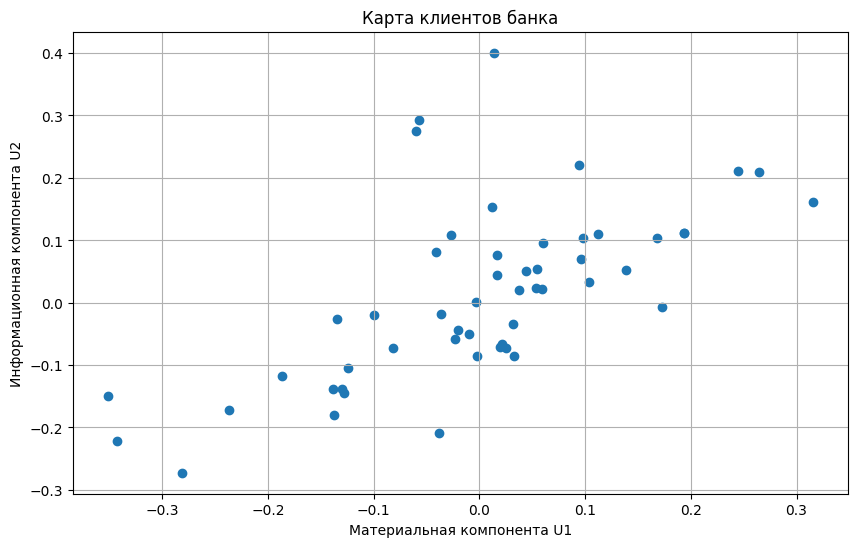

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('Карта клиентов банка')
plt.xlabel('Материальная компонента U1')
plt.ylabel('Информационная компонента U2')
plt.grid()
plt.show()

**Комментарий:** По карте клиентов что соответствующие точки располагаются примерно вдоль прямой y = a * x, где a - небольшой понижающий коэффициент, что говорит о наличии прямой пропорциональной зависимости между U1 и U2. Однако стоит также отметить, что существует и небольшое количество выбросов.

# Снижение размерности. Метод MDS (Multidimensional Scaling = многомерное шкалирование)

### 9. Вычислите расстояние между клиентами любым понравившемся вам способом. Проверьте, можно ли клиентов банка поместить в евклидово пространство размерности 2 с сохранением расстояний между клиентами.

In [40]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS

Выполним проверку на возможность размещения клиентов в евклидовом пространсве размерности 2 с сохранением расстояний (проверка на неотрицательность расстояний, проверка на симметричность расстояний (A -> B == B -> A) и проверку выполнения неравенства треугольника для любых 3 точек из пространства).

In [41]:
distances = pairwise_distances(Z_data_norm, metric='euclidean')

def check_metric_conditions(distances):
    if np.any(distances < 0):
        return False

    if not np.allclose(distances, distances.T):
        return False

    n = distances.shape[0]
    for i in range(n):
        for j in range(n):
            for k in range(n):
                if distances[i, k] > distances[i, j] + distances[j, k]:
                    return False

    return True

if check_metric_conditions(distances):
    print("Клиентов МОЖНО разместить в евклидово пространство размерности 2 с сохранением расстояний.")
else:
    print("Клиентов НЕЛЬЗЯ разместить в евклидово пространство размерности 2 с сохранением расстояний.")

Клиентов МОЖНО разместить в евклидово пространство размерности 2 с сохранением расстояний.


Также проверим через матрицу Грама:

In [72]:
n = distances.shape[0]
centr = np.eye(n) - 1 / n * np.ones((n, n))
mtrx = np.dot(np.dot(- 0.5 * centr, (distances ** 2)), centr)

values = np.linalg.eigvalsh(mtrx)
np.around(values, 2)

array([-0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  ,
       -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  ,
       -0.  , -0.  , -0.  , -0.  , -0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.01,  0.03,  0.11,  0.54,  2.35,  2.97])

**Комментарий:** Так как матрица является неотрицательно определённой, мы можем поместить векторы, соответствующие клиентам банка, в евклидово пространство размерности 2, при этом расстояния между клиентами будут сохранены.


### 10. Используйте любой из алгоритмов MDS для размещения объектов в евклидовом пространстве размерности 2. Оцените погрешность такого размещения. Постройте карту клиентов. Сравните с картой клиентов из п.8 и сделайте выводы.

In [52]:
mds = MDS(n_components=2, metric=False, random_state=42)
X_mds = mds.fit_transform(Z_data_norm)

stress = mds.stress_
print(f'Погрешность размещения (stress) при n=2 : {round(stress, 5)}')

Погрешность размещения (stress) при n=2 : 0.29131


**Комментарий:** Погрешность размещения можно оценить с помощью финального значения `stress` функции (что позволяет оценить сумму квадратов разницы изначальных и полученных расстояний), которое в данном случае равно 0.29131.

*Значение 0 указывает на «идеальную» подгонку, 0,025 — на отличную, 0,05 — на хорошую, 0,1 — на удовлетворительную, 0,2 — на плохую*

Такое высокое значение стресса может указывать на то, что данные плохо укладываются в выбранное пространство (в данном случае, в 2D), и существует значительное искажение при визуализации. В качестве решения стоит рассмотреть использование более высокой размерности (например, 3D) или другие методы снижения размерности, которые могут лучше захватывать сложные взаимосвязи в данных.

В качестве проверки этого факта посчитаем `stress` для пространства 3D.

In [54]:
mds_3 = MDS(n_components=3,  metric=False, random_state=42)
X_mds_3 = mds_3.fit_transform(Z_data_norm)

stress_3 = mds_3.stress_
print(f'Погрешность размещения (stress) при n=3 : {round(stress_3, 5)}')

Погрешность размещения (stress) при n=3 : 0.23704


**Комментарий:** Отметим, что при размерности пространства n = 3 значение погрешности размещения `stress` = 0.23704, что немного ниже, чем при n = 2.

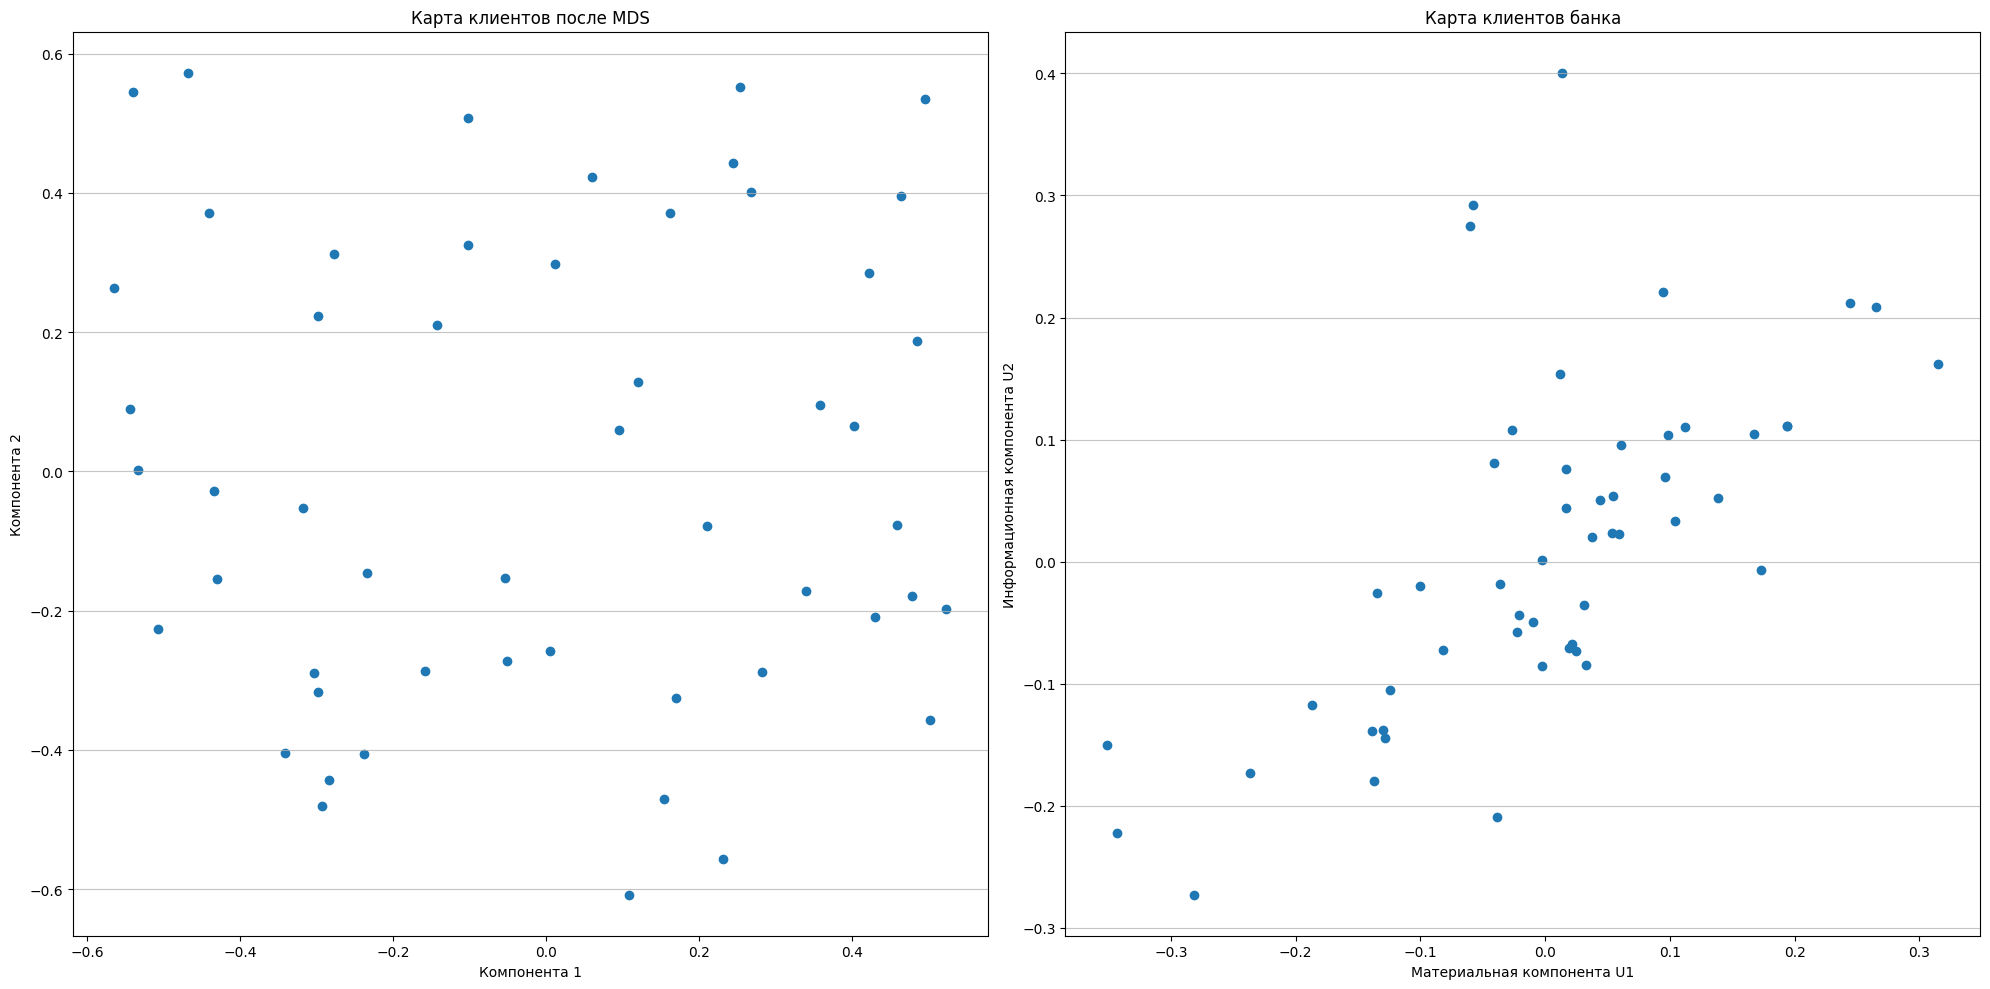

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].scatter(X_mds[:, 0], X_mds[:, 1], marker='o')
axs[0].set_title('Карта клиентов после MDS')
axs[0].set_xlabel('Компонента 1')
axs[0].set_ylabel('Компонента 2')
axs[0].grid(axis='y', alpha=0.75)

axs[1].scatter(pca_df['PC1'], pca_df['PC2'])
axs[1].set_title('Карта клиентов банка')
axs[1].set_xlabel('Материальная компонента U1')
axs[1].set_ylabel('Информационная компонента U2')
axs[1].grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

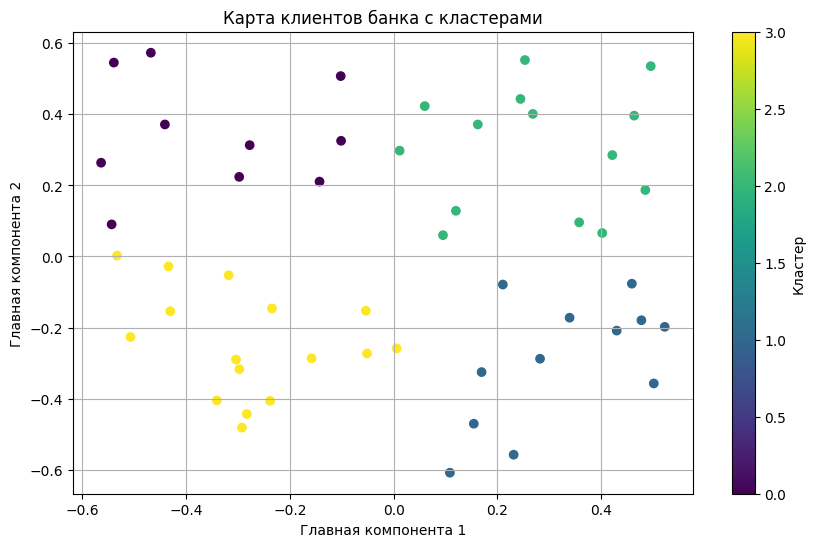

In [69]:
from sklearn.cluster import KMeans
df_mds = pd.DataFrame(X_mds, columns=['K1', 'K2'])
kmeans = KMeans(n_clusters=4)  # Предположим, мы хотим выделить 3 группы

df_mds['Cluster'] = kmeans.fit_predict(df_mds)

# Визуализация с выделением кластеров
plt.figure(figsize=(10, 6))
plt.scatter(df_mds['K1'], df_mds['K2'], c=df_mds['Cluster'], cmap='viridis')
plt.title('Карта клиентов банка с кластерами')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.colorbar(label='Кластер')
plt.grid()
plt.show()

**Комментарий:** На графике клиентов после MDS можно выделить, что данные стали более разреженными. Условно можно увидеть 4 кластера.  

MDS позволяет оценить расстояния между объектами и визуализировать объекты в пространстве меньшей размерности, это полезно для извлечения локальной информации об объектах. Однако стоит отметить, что из-за высого значения переменной `stress` на графике присутствует большое искажение, так что объективного сравнения не получится.

**Вывод**: На примере данных о клиентах банка было выполнено снижение размерности с помощью PCA и MDS. Карты клиентов сильно различаются.

# Бонус. Снижение размерности. Интерпретация скрытых факторов.

1. Выписать матрицу коэффициентов разложения признаков zj по главным факторам. Исследовать структуру этой матрицы с целью выделения групп признаков тесно связанных с каждым из главных факторов.
2. На основе анализа структуры матрицы коэффициентов разложения, предложить интерпретацию выделенным главным факторам. Дать интерпретацию построенной выше карте клиентов.

In [45]:
new_df = pd.DataFrame(columns=[])
new_df_columns = ['Ages', 'Count_dependent', 'Income', 'Time_period_reg', 'Estimation', 'Credit_size']

for j in range(len(new_df_columns)):
    z_j = S[0] * V[j][0] * U0 + S[1] * V[j][1] * U1
    print(f"z{j} = ({S[0] * V[j][0]} * U0) + ({S[1] * V[j][1]} * U1)")
    new_df[new_df_columns[j]] = z_j

z0 = (-0.618278221122634 * U0) + (0.7032808792891287 * U1)
z1 = (-0.11695986271323955 * U0) + (0.9555780550445897 * U1)
z2 = (0.8160513232171889 * U0) + (0.4365059768918449 * U1)
z3 = (-0.7129992050619219 * U0) + (0.6546166832363074 * U1)
z4 = (0.8062131817689862 * U0) + (0.2998399528014941 * U1)
z5 = (0.8647504799420707 * U0) + (0.4803495472098178 * U1)


**Главный фактор U0:**

Возраст и срок проживания имеют отрицательные значения, что может указывать на то, что с увеличением возраста или срока проживания вероятность получения кредита снижается.

Доход, оценка автомобиля и размер кредита имеют положительные значения, что говорит о том, что с увеличением этих показателей вероятность получения кредита возрастает.

**Главный фактор U1:**

Все признаки имеют положительные значения, что указывает на то, что увеличение любого из этих факторов связано с увеличением вероятности получения кредита.

Особенно сильное влияние оказывают количество иждивенцев и возраст, что может говорить о том, что более зрелые заемщики с большим количеством иждивенцев более вероятно получают кредиты.

### Вывод:

**Фактор U0:** В основном определяет финансовую состоятельность заемщика (доход, стоимость автомобиля, размер кредита). Чем выше эти показатели, тем выше вероятность получения кредита.

**Фактор U1:** Описывает социальные аспекты заемщика (возраст, количество иждивенцев, срок проживания). Более зрелые заемщики с иждивенцами имеют большую вероятность получения кредита.